# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

***RESPUESTA***

Los datos que creo pueden ayudarme en la tarea de crear un modelo de Machine Learning que prediga el precio de venta de diferentes propiedades son: 
- Si es una Casa o un Departamento
- Tamaño del terreno de la propidad (en caso de ser un departamento pondríamos la misma cantidad que b)
- Cantidad de metros cuadrados cubiertos de la propiedad
- Distribución de la propiedad (cantidad de habitaciones, baños, cocinas, etc)
- Antigüedad de la propiedad (podemos establecer rangos, quizás)
- Si incluye algún mobiliario o comodidad (heladera, aire acondicionado, cocina, etc)
- Zona a la que pertenece la propiedad(podría delimitar distintas zonas de la ciudad para establecer este parámetro. En términos de si es una zona nueva, vieja, con casa recientes, microcentro)


### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

0. Importa las librerías necesarias para trabajar en la consigna.

In [211]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
import pandas as pd
import numpy as np

Proyecto = pd.read_csv('Proyecto_1.csv', header = 0)
Proyecto

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [212]:
# Cantidad de filas y columnas
print(Proyecto.shape)


(146660, 19)


In [213]:
#Cinco primeras instancias. El valor predeterminado de .head() es 5,asique no es necesario ponerlo
Proyecto.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [214]:
#Nombre de las columnas 
print(Proyecto.columns)

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


In [215]:
#Valores faltantes por columna
valores_faltantes = Proyecto.isnull().sum()
valores_faltantes[:]

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

#Cargo algunas maneras de conocer tanto los tipos de propiedades como la cantidad por cada tipo, el primero es el que consideré 'mejor'

Tipos_de_propiedades = Proyecto.groupby(['property_type']).size().reset_index(name='cantidad_tipo')
print(Tipos_de_propiedades)

     property_type  cantidad_tipo
0             Casa          21521
1    Casa de campo            322
2          Cochera            259
3     Departamento         107326
4         Depósito            265
5  Local comercial            325
6             Lote           1312
7          Oficina            658
8             Otro            374
9               PH          14298


In [217]:
Tipos_de_propiedades.count


<bound method DataFrame.count of      property_type  cantidad_tipo
0             Casa          21521
1    Casa de campo            322
2          Cochera            259
3     Departamento         107326
4         Depósito            265
5  Local comercial            325
6             Lote           1312
7          Oficina            658
8             Otro            374
9               PH          14298>

In [218]:
Proyecto.property_type.unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

Text(0, 0.5, 'Cantidad de propiedades')

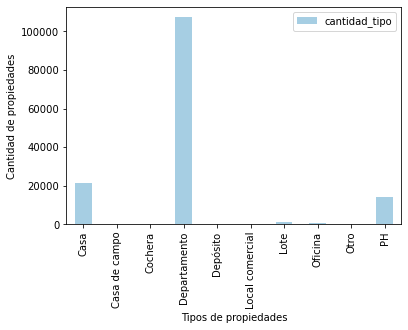

In [219]:
# Graficamos, donde podemos ver que los tipos de propiedades que hay en mayor cantidad son las casas, departamentos y PH
Grafico = Tipos_de_propiedades.groupby('property_type')['cantidad_tipo'].sum().plot(kind='bar', cmap='Paired', legend='Reverse')
plt.xlabel('Tipos de propiedades')
plt.ylabel('Cantidad de propiedades')


In [220]:
#Y vemos facilmente que la mayor parte de las propiedades son Departamentos, Casas y PH

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [221]:
# Graficamos de acuerdo a la zona
Zona = Proyecto.groupby(['l2']).size().reset_index(name='cantidad_zona')
print(Zona)


                         l2  cantidad_zona
0  Bs.As. G.B.A. Zona Norte          24282
1  Bs.As. G.B.A. Zona Oeste          12666
2    Bs.As. G.B.A. Zona Sur          17173
3           Capital Federal          92539


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bs.As. G.B.A. Zona Norte'),
  Text(1, 0, 'Bs.As. G.B.A. Zona Oeste'),
  Text(2, 0, 'Bs.As. G.B.A. Zona Sur'),
  Text(3, 0, 'Capital Federal')])

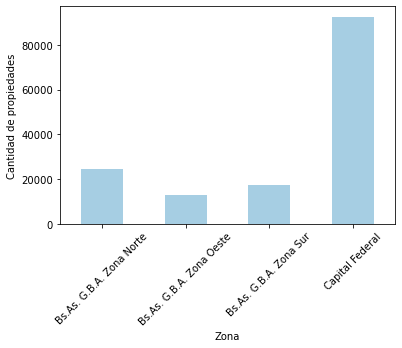

In [222]:
Grafico_l2 = Zona.groupby('l2')['cantidad_zona'].sum().plot(kind='bar', cmap='Paired')
plt.xlabel('Zona')
plt.ylabel('Cantidad de propiedades')
plt.xticks(rotation=45)


#Podemos ver que la mayor cantidad de publicaciones son para propiedades en Capital Federal

In [223]:
#Graficamos de acuerdo al Barrio
Barrio = Proyecto.groupby(['l3']).size().reset_index(name='cantidad_barrio')
print(Barrio)


                  l3  cantidad_barrio
0             Abasto              462
1          Agronomía              165
2            Almagro             7527
3    Almirante Brown             1228
4         Avellaneda             1370
..               ...              ...
84   Villa Riachuelo               42
85  Villa Santa Rita              354
86     Villa Soldati               69
87     Villa Urquiza             3339
88  Villa del Parque             1361

[89 rows x 2 columns]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88]),
 [Text(0, 0, 'Abasto'),
  Text(1, 0, 'Agronomía'),
  Text(2, 0, 'Almagro'),
  Text(3, 0, 'Almirante Brown'),
  Text(4, 0, 'Avellaneda'),
  Text(5, 0, 'Balvanera'),
  Text(6, 0, 'Barracas'),
  Text(7, 0, 'Barrio Norte'),
  Text(8, 0, 'Belgrano'),
  Text(9, 0, 'Berazategui'),
  Text(10, 0, 'Boca'),
  Text(11, 0, 'Boedo'),
  Text(12, 0, 'Caballito'),
  Text(13, 0, 'Catalinas'),
  Text(14, 0, 'Cañuelas'),
  Text(15, 0, 'Centro / Microcentro'),
  Text(16, 0, 'Chacarita'),
  Text(17, 0, 'Coghlan'),
  Text(18, 0, 'Colegiales'),
  Text(19, 0, 'Congreso'),
  Text(20, 0, 'Constitución'),
  Text(21

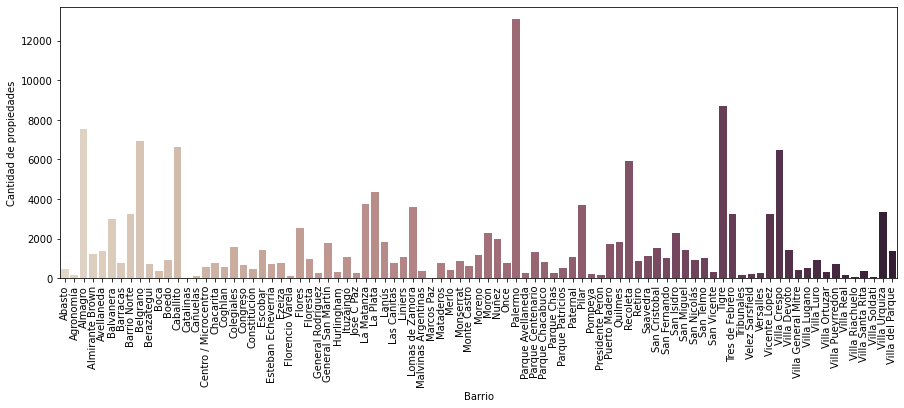

In [224]:

fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(x="l3", y="cantidad_barrio", palette="ch:.25", data=Barrio, ax=ax)
plt.xlabel('Barrio')
plt.ylabel('Cantidad de propiedades')
plt.xticks(rotation= 90)

#Podemos ver que Palermo, Tigre y Almagro son los barrios donde hay mayor concentración de propiedades publicadas.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [225]:
# En este caso generamos una máscara llamada 'nuevo_dataframe' con datos vistos en los gráficos

nuevo_dataframe = Proyecto[((Proyecto['property_type'] == 'Casa') | (Proyecto['property_type'] == 'PH') | (Proyecto['property_type'] == 'Departamento')) & (Proyecto['l2'] == 'Capital Federal')]
nuevo_dataframe


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146554,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,USD,Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa...,Espectacular Ph 4 Ambientes de excelente calid...,PH,Venta
146555,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,USD,PH Reciclado a nuevo en pleno Palermo Hollywood!,Espectacular Ph 3 Ambientes de excelente calid...,PH,Venta
146556,2019-07-31,2020-01-17,2019-07-31,-34.584134,-58.436389,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,USD,Hermoso PH reciclado - 4 ambientes + Pileta + ...,"Hermoso PH reciclado en Palermo, 143 m2 cubier...",PH,Venta
146557,2019-07-31,2019-08-23,2019-07-31,-34.583995,-58.417645,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,USD,Venta. Departamento. 3 Ambientes. 145m². Ampli...,CARACTERÍSTICAS- Ambientes: 3.- Superficie tot...,Departamento,Venta


In [226]:
# Comprobamos el checkpoint
nuevo_dataframe.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

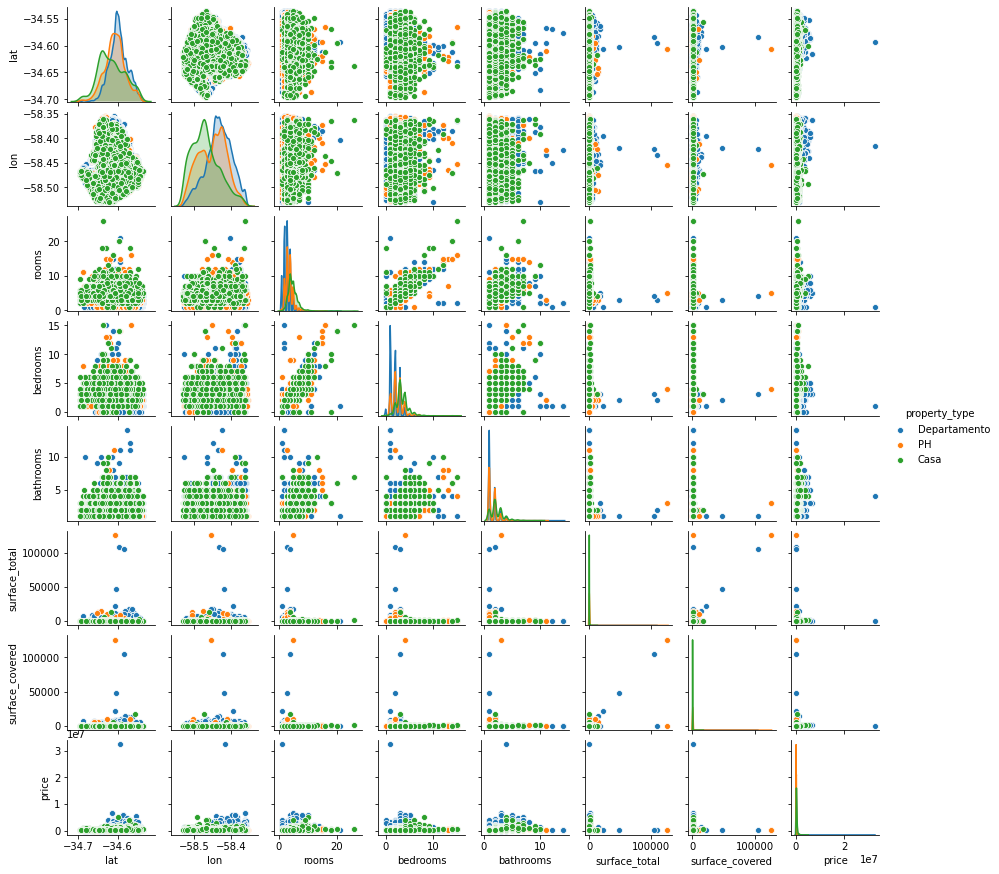

In [227]:
#Ejecutamos un pairplot, para poder ver la relación de las variables de a pares de acuerdo al tipo de propiedad

sns.pairplot(nuevo_dataframe, hue= 'property_type', height=1.5,)


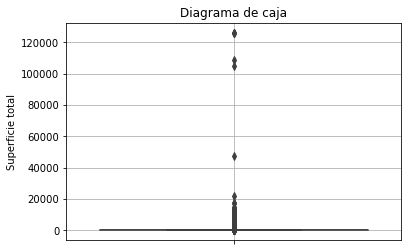

In [228]:
# Imprimimos un boxplot para conocer el rango de valores 'más razonable' para trabajar las superficies

ax = sns.boxplot(data= nuevo_dataframe, y= nuevo_dataframe["surface_total"])
plt.title("Diagrama de caja")
plt.xlabel("")
plt.ylabel('Superficie total')
plt.grid()

In [229]:
#Con lo observado en el gráfico anterior lo filtramos y realizamos un nuevo boxplot

data = nuevo_dataframe[(nuevo_dataframe['surface_total'] <= 30000) & (nuevo_dataframe['surface_total'] >= 10000)]


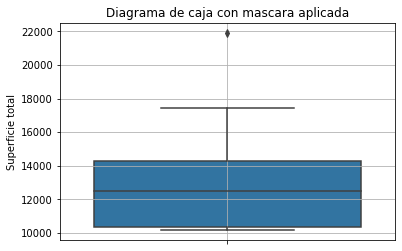

In [230]:
ax = sns.boxplot(data=data, y= data["surface_total"])
plt.title("Diagrama de caja con mascara aplicada")
plt.xlabel("")
plt.ylabel('Superficie total')
plt.grid()

In [231]:
# Borramos aquellas instancias donde surface_covered > surface_total, para iniciar un pulido del nuevo_dataframe

datos_borrar = data[(data['surface_covered']) > (data['surface_total'])].index 
data = data.drop(datos_borrar) 

In [232]:
data

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,1.600000e+01
mean,-34.601546,-58.442495,3.562500,2.562500,1.68750,13235.562500,5686.000000,3.175562e+05
std,0.030671,0.030317,0.892095,0.629153,0.60208,3313.482417,6629.223615,2.720614e+05
min,-34.652462,-58.506891,1.000000,1.000000,1.00000,10145.000000,53.000000,5.000000e+04
25%,-34.620280,-58.461814,3.000000,2.000000,1.00000,10342.250000,125.000000,1.987500e+05
50%,-34.603645,-58.447422,4.000000,3.000000,2.00000,12506.500000,3053.500000,2.425000e+05
75%,-34.579060,-58.418594,4.000000,3.000000,2.00000,14288.750000,9725.750000,3.275000e+05
max,-34.558000,-58.394502,5.000000,3.000000,3.00000,21920.000000,21920.000000,1.250000e+06


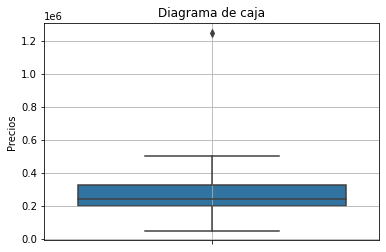

In [233]:
#Ahora trabajamos con los precios, primero graficamos un Boxplot para conocer los rangos de precios más acordes

ax = sns.boxplot(data= data, y= data["price"])
plt.title("Diagrama de caja")
plt.xlabel("")
plt.ylabel('Precios')
plt.grid()

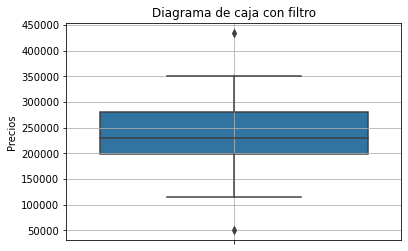

In [234]:
#Generamos un filtro que nos permita quitar outliers y graficamos nuevamente

data_precios = data[(data['price'] <= 450000) & (data['price'] >= 50000)]

ax = sns.boxplot(data = data_precios, y = data_precios["price"])
plt.title("Diagrama de caja con filtro")
plt.xlabel("")
plt.ylabel('Precios')
plt.grid()

C:\Users\Usuario\miniconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\miniconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\miniconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\miniconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\miniconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\miniconda3\lib\site-packages\seaborn\distributions.py:283:

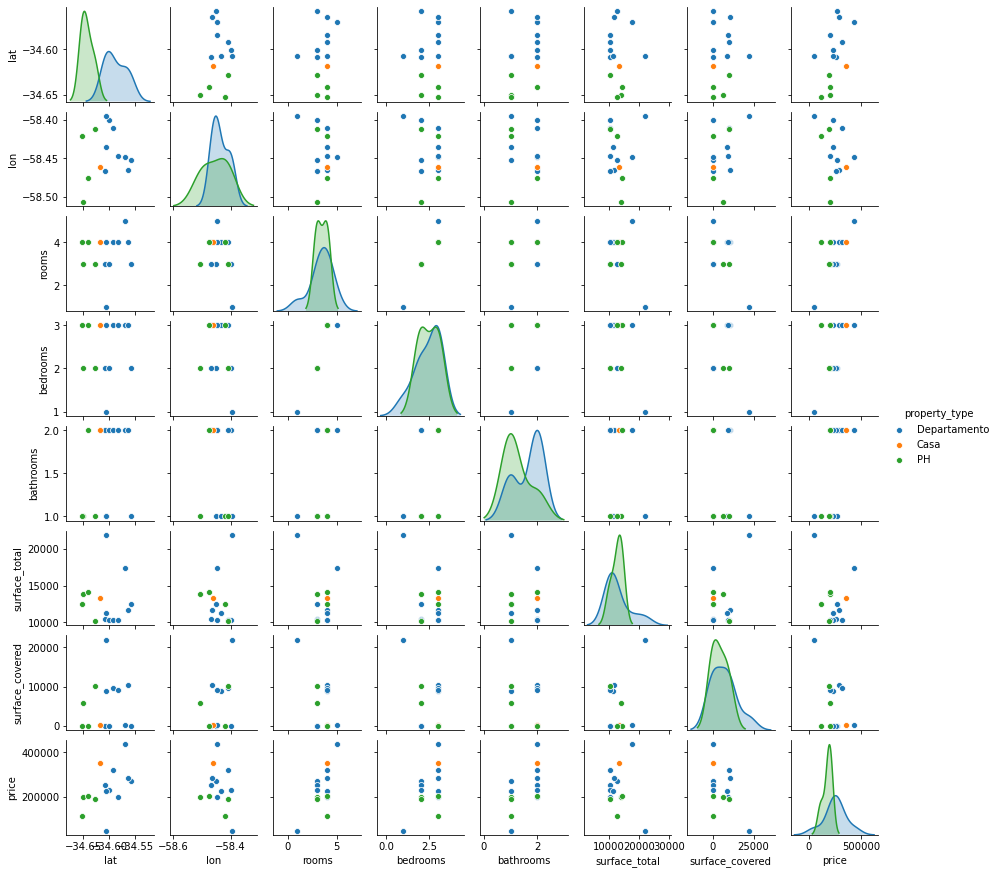

In [235]:
#Con los nuevos filtros ya aplicados, volvemos a imprimir un pairplot para ver posibles nuevas relaciones

sns.pairplot(data_precios, hue= 'property_type')


6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [237]:
#Correlación de variables
data_precios.corr()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,0.116827,0.147745,0.069746,0.331882,-0.021740,0.094610,0.510902
lon,0.116827,1.000000,-0.318034,-0.261552,-0.155043,0.064508,0.391789,-0.303581
rooms,0.147745,-0.318034,1.000000,0.943042,0.477767,-0.382980,-0.540434,0.691068
bedrooms,0.069746,-0.261552,0.943042,1.000000,0.460566,-0.394950,-0.389608,0.522874
bathrooms,0.331882,-0.155043,0.477767,0.460566,1.000000,-0.233411,-0.318705,0.588712
surface_total,-0.021740,0.064508,-0.382980,-0.394950,-0.233411,1.000000,0.361197,-0.205367
surface_covered,0.094610,0.391789,-0.540434,-0.389608,-0.318705,0.361197,1.000000,-0.485615
price,0.510902,-0.303581,0.691068,0.522874,0.588712,-0.205367,-0.485615,1.000000


<AxesSubplot:>

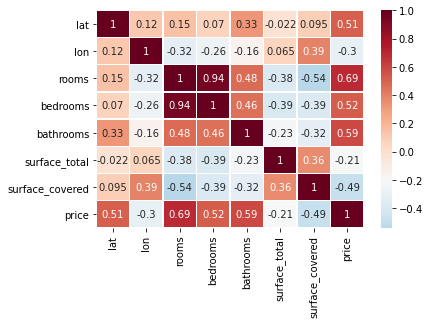

In [238]:
#Gráfico de la correlacion
correlacion = data_precios.corr()
sns.heatmap(correlacion,
           xticklabels = correlacion.columns.values,
           yticklabels = correlacion.columns.values,
           linecolor='white', annot=True, cmap="RdBu_r", linewidths=.5,
           center=correlacion.loc['price', 'surface_total'])




In [239]:
# Podemos ver como los bathrooms y bedrooms son buenos indicadores para predecir el precio

### 2.1 Desafío

In [240]:


#Una buena variable para predecir el precio es el valor del m2, es decir el precio/superficie total
#ya que nos permite estandarizar una variable con la que podríamos fijar el precio de todas las propidades.
#Además y en un estudio más complejo podemos estudiar la relación entre el precio del m2 en cada barrio. 

nuevo_df = data_precios.copy()
nuevo_df['price_m2'] = nuevo_df['price']/nuevo_df['surface_total']

nuevo_df

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,price_m2
1229,2019-12-30,2020-01-19,2019-12-30,-34.558000,-58.452600,Argentina,Capital Federal,Belgrano,3.0,2.0,1.0,12521.0,53.0,270000.0,USD,VENTA. BELGRANO 3 AMB. 2 PATIOS.,Corredor Responsable: OSCAR N. LIBERMAN - CUCI...,Departamento,Venta,21.563773
3125,2019-08-18,2019-09-14,2019-08-18,-34.617863,-58.460628,Argentina,Capital Federal,Flores,4.0,3.0,2.0,13250.0,194.0,350000.0,USD,VENTA LOTE 135m2- CASA 5 amb. 220m2. FLORES,Corredor Responsable: NORTE BIENES RAICES S.A....,Casa,Venta,26.415094
6572,2019-11-25,2019-12-02,2019-11-25,-34.649891,-58.506891,Argentina,Capital Federal,Mataderos,3.0,2.0,1.0,13903.0,5913.0,198000.0,USD,VENTA PH EXCELENTE ESTADO 3AMB+ QUINCHO,Corredor Responsable: Hernan Perrone - C.U.C.I...,PH,Venta,14.241531
8456,2019-12-22,2020-01-13,2019-12-22,-34.569783,-58.448618,Argentina,Capital Federal,Belgrano,5.0,3.0,2.0,17444.0,150.0,435000.0,USD,DEPARTAMENTO 5 AMBIENTES CIUDAD DE LA PAZ AL 1000,Corredor Responsable: OSCAR N. LIBERMAN - CUCI...,Departamento,Venta,24.936941
13200,2019-08-05,2019-12-03,2019-08-05,-34.564460,-58.465373,Argentina,Capital Federal,Belgrano,4.0,3.0,2.0,11626.0,10509.0,285000.0,USD,Semipiso de 4 amb. c/dependencia Belgrano R,Corredor Responsable: MARCELO DE ELIZALDE - CP...,Departamento,Venta,24.514020
54269,2019-06-04,2019-09-14,2019-06-04,-34.608293,-58.466668,Argentina,Capital Federal,Villa General Mitre,3.0,2.0,2.0,10370.0,86.0,255000.0,USD,Departamento de 3 ambientes a estrenar en venta,Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento,Venta,24.590164
61901,2019-06-09,2019-09-14,2019-06-09,-34.600540,-58.399348,Argentina,Capital Federal,Once,3.0,2.0,2.0,10228.0,98.0,230000.0,USD,VENTA DEPARTAMENTO ONCE 4 AMBIENTES,Corredor Responsable: Rebeca Stern - C.U.C.I.C...,Departamento,Venta,22.487290
64973,2019-07-14,2019-08-17,2019-07-14,-34.641320,-58.475589,Argentina,Capital Federal,Floresta,4.0,3.0,2.0,14107.0,130.0,205000.0,USD,PH 3 DORMITORIOS COCH. PARRILLA PARQUE AVELLA...,Corredor Responsable: Ariel Champanier - C.U.C...,PH,Venta,14.531793
68028,2019-06-18,2019-09-14,2019-06-18,-34.606830,-58.434956,Argentina,Capital Federal,Parque Centenario,4.0,3.0,1.0,11250.0,8830.0,229000.0,USD,Depto.4 amb.frente..a reciclar con patio. sin ...,Corredor Responsable: Hernan Perrone - C.U.C.I...,Departamento,Venta,20.355556
79505,2019-12-13,2019-12-17,2019-12-13,-34.652462,-58.421110,Argentina,Capital Federal,Pompeya,4.0,3.0,1.0,12492.0,110.0,115000.0,USD,"PH EN VENTA EN POMPEYA, OPORTUNIDAD, 4 AMB",Corredor Responsable: Mónica Silvia Martinuzzi...,PH,Venta,9.205892


In [241]:
#Vemos las 10 propiedades con los m2 más caros

In [242]:
propiedades_mas_caras = nuevo_df.sort_values(by=['price_m2']).head(10)
propiedades_mas_caras

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,price_m2
118389,2020-01-09,2020-01-21,2020-01-09,-34.606750,-58.394502,Argentina,Capital Federal,Congreso,1.0,1.0,1.0,21920.0,21920.0,50000.0,USD,Monoambiente en Congreso,Corredor Responsable: JUAN FRANCISCO CARATTINO...,Departamento,Venta,2.281022
79505,2019-12-13,2019-12-17,2019-12-13,-34.652462,-58.421110,Argentina,Capital Federal,Pompeya,4.0,3.0,1.0,12492.0,110.0,115000.0,USD,"PH EN VENTA EN POMPEYA, OPORTUNIDAD, 4 AMB",Corredor Responsable: Mónica Silvia Martinuzzi...,PH,Venta,9.205892
6572,2019-11-25,2019-12-02,2019-11-25,-34.649891,-58.506891,Argentina,Capital Federal,Mataderos,3.0,2.0,1.0,13903.0,5913.0,198000.0,USD,VENTA PH EXCELENTE ESTADO 3AMB+ QUINCHO,Corredor Responsable: Hernan Perrone - C.U.C.I...,PH,Venta,14.241531
64973,2019-07-14,2019-08-17,2019-07-14,-34.641320,-58.475589,Argentina,Capital Federal,Floresta,4.0,3.0,2.0,14107.0,130.0,205000.0,USD,PH 3 DORMITORIOS COCH. PARRILLA PARQUE AVELLA...,Corredor Responsable: Ariel Champanier - C.U.C...,PH,Venta,14.531793
84703,2019-03-27,2019-08-07,2019-03-27,-34.627533,-58.411046,Argentina,Capital Federal,San Cristobal,3.0,2.0,1.0,10145.0,10145.0,189900.0,USD,PH ATIPICO ENTRADA INDEPEND./DANEL1400-S.CRIST...,Corredor Responsable: Ariel Champanier - C.U.C...,PH,Venta,18.718581
131723,2019-10-08,2019-11-12,2019-10-08,-34.583663,-58.446227,Argentina,Capital Federal,Palermo,4.0,3.0,2.0,10240.0,9256.0,199000.0,USD,VENTA DEPTO. 4 AMB. 3 DORM. PALERMO HOLLYWOOD ...,Corredor Responsable: Mariano Menendez - CUCIC...,Departamento,Venta,19.433594
68028,2019-06-18,2019-09-14,2019-06-18,-34.606830,-58.434956,Argentina,Capital Federal,Parque Centenario,4.0,3.0,1.0,11250.0,8830.0,229000.0,USD,Depto.4 amb.frente..a reciclar con patio. sin ...,Corredor Responsable: Hernan Perrone - C.U.C.I...,Departamento,Venta,20.355556
1229,2019-12-30,2020-01-19,2019-12-30,-34.558000,-58.452600,Argentina,Capital Federal,Belgrano,3.0,2.0,1.0,12521.0,53.0,270000.0,USD,VENTA. BELGRANO 3 AMB. 2 PATIOS.,Corredor Responsable: OSCAR N. LIBERMAN - CUCI...,Departamento,Venta,21.563773
61901,2019-06-09,2019-09-14,2019-06-09,-34.600540,-58.399348,Argentina,Capital Federal,Once,3.0,2.0,2.0,10228.0,98.0,230000.0,USD,VENTA DEPARTAMENTO ONCE 4 AMBIENTES,Corredor Responsable: Rebeca Stern - C.U.C.I.C...,Departamento,Venta,22.487290
13200,2019-08-05,2019-12-03,2019-08-05,-34.564460,-58.465373,Argentina,Capital Federal,Belgrano,4.0,3.0,2.0,11626.0,10509.0,285000.0,USD,Semipiso de 4 amb. c/dependencia Belgrano R,Corredor Responsable: MARCELO DE ELIZALDE - CP...,Departamento,Venta,24.514020


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Congreso'),
  Text(1, 0, 'Pompeya'),
  Text(2, 0, 'Mataderos'),
  Text(3, 0, 'Floresta'),
  Text(4, 0, 'San Cristobal'),
  Text(5, 0, 'Palermo'),
  Text(6, 0, 'Parque Centenario'),
  Text(7, 0, 'Belgrano'),
  Text(8, 0, 'Once')])

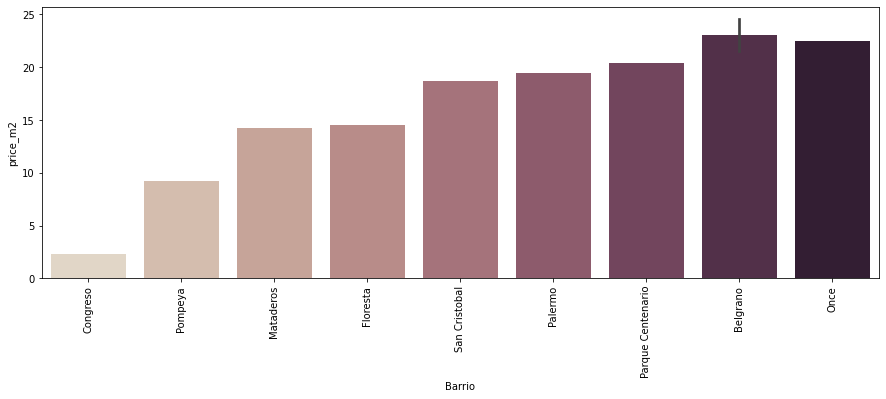

In [243]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(x="l3", y="price_m2", palette="ch:.25", data=propiedades_mas_caras, ax=ax)
plt.xlabel('Barrio')
plt.ylabel('price_m2')
plt.xticks(rotation= 90)

#Podemos ver en que barrios están las propiedades con el m2 más costoso. 

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [244]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


In [245]:
#Después de improtar librerías que me van a ser útiles en este proceso, inicié por filtrar mi dataset


In [246]:


modelo = nuevo_dataframe[(nuevo_dataframe['l2'] == 'Capital Federal') & (nuevo_dataframe['surface_total'] <= 1000)
                            & (nuevo_dataframe['surface_total'] >= 15) & (nuevo_dataframe['price'] <= 4000000)]

In [247]:
modelo

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146554,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,USD,Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa...,Espectacular Ph 4 Ambientes de excelente calid...,PH,Venta
146555,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,USD,PH Reciclado a nuevo en pleno Palermo Hollywood!,Espectacular Ph 3 Ambientes de excelente calid...,PH,Venta
146556,2019-07-31,2020-01-17,2019-07-31,-34.584134,-58.436389,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,USD,Hermoso PH reciclado - 4 ambientes + Pileta + ...,"Hermoso PH reciclado en Palermo, 143 m2 cubier...",PH,Venta
146557,2019-07-31,2019-08-23,2019-07-31,-34.583995,-58.417645,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,USD,Venta. Departamento. 3 Ambientes. 145m². Ampli...,CARACTERÍSTICAS- Ambientes: 3.- Superficie tot...,Departamento,Venta


In [248]:
ML = modelo.loc[ : ,['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
ML = ML.dropna()
ML

#Donde ML cumple con los parámetros planteados por el Checkpoint

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0
...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0
146555,3.0,2.0,2.0,144.0,134.0,480000.0
146556,4.0,2.0,2.0,317.0,143.0,530000.0
146557,3.0,2.0,2.0,145.0,145.0,420000.0


In [249]:
# Con ML ya filtrado correctamente generamos X e y, y sus conjuntos de Train y Test

X = ML.drop('price', axis='columns')
y = ML['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, train_size=0.80, random_state=42)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(64815, 5) (64815,) (16204, 5) (16204,)


**Planteamos y entrenamos los modelos**

In [250]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [251]:
tree_regressor.fit(X_train, y_train) #Entrenando el modelo

DecisionTreeRegressor(max_depth=3, random_state=42)

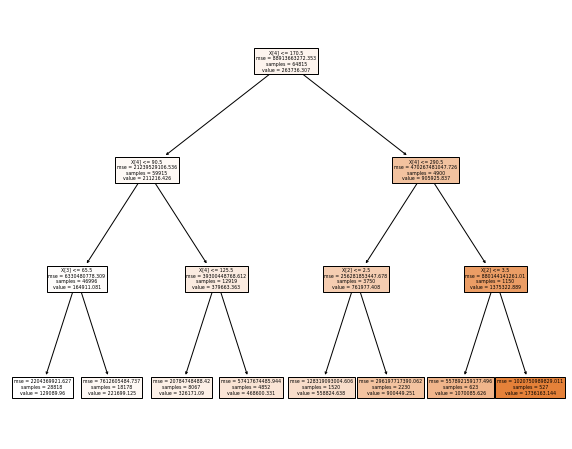

In [252]:
from sklearn import tree

if tree_regressor.max_depth < 4:
    plt.figure(figsize = (10,8))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

In [253]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [254]:
linear_model.fit(X_train, y_train)

LinearRegression()

Imprimimos pendientes y ordenada al origen de la Regresión Lineal

In [255]:
print(linear_model.coef_, linear_model.intercept_)

[ 1.29398617e+04 -6.46339344e+04  1.32135227e+05  2.08869346e+03
  9.06313765e+01] -58069.82011360454




Gráfico de comparación

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199315.87121054775
Raíz del error cuadrático medio en Test: 203269.83120125555


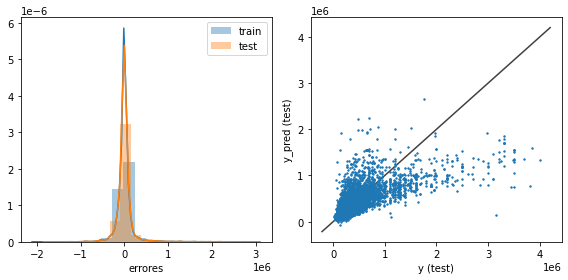

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 191995.85978715765
Raíz del error cuadrático medio en Test: 195297.34650761852


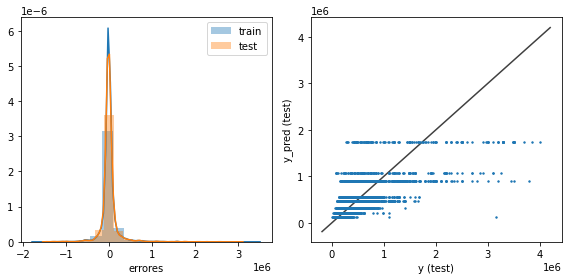

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 120366.72741717355
Raíz del error cuadrático medio en Test: 152977.30770363222


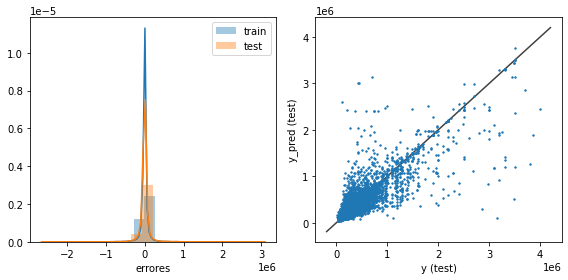

In [256]:
from sklearn.metrics import mean_squared_error
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrado promedio en Train: {rmse_train}')
    print(f'Raíz del error cuadrado promedio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

SOBRE LA FORMA DE MEDIR EL ERROR

La forma que elegimos para medir el error de nuestros modelos fue el RMSE (Root Mean Squared Error). Esta métrica nos indica que a más bajo el valor que nos devuelve, menor el error.

Podemos ver que los valores de error son altos y parecidos para todos los casos. 

SOBRE MI CONCLUSIÓN:

Una buena forma de trabajar este dataset es con la regresión lineal, porque es un problema de regresión y no de clasificación, ya que buscamos proyectar el precio con caracteristicas de las propiedades.



SOBRE LAS MEJORAS:

Eventualmente podemos reducirlos niveles de error realizando un filtrado mejor, quitando datos outliers. O con una forma de medir errores que no sea tan sensible a los valores atípicos. 

O podemos generar otras métricas que nos sean útiles para la predicción de valores de propiedades, mas o menos como propongo en el desafío, donde tenemos los valores por metro cuadrado, y podemos complementarlos con el valor del metro cuadrado + la zona de la propiedad. 